In [140]:
%matplotlib inline
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,explained_variance_score
from plot_feature import plot_feature_importance

In [102]:
house_data = datasets.load_boston()

In [103]:
type(house_data)

sklearn.utils.Bunch

In [104]:
house_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [105]:
X,y = shuffle(house_data.data,house_data.target,random_state=7)

In [106]:
X

array([[3.8497e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.9134e+02,
        1.3270e+01],
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [2.4103e-01, 0.0000e+00, 7.3800e+00, ..., 1.9600e+01, 3.9690e+02,
        1.2790e+01],
       ...,
       [8.4054e-01, 0.0000e+00, 8.1400e+00, ..., 2.1000e+01, 3.0342e+02,
        1.6510e+01],
       [4.0110e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.9690e+02,
        4.0800e+00],
       [6.6640e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9096e+02,
        5.3300e+00]])

In [107]:
y

array([21.7, 18.5, 22.2, 20.4,  8.8,  8.3, 21.4, 23.6, 23.5, 19. , 10.2,
       31.6, 18.4, 19.4, 44. , 23.2, 22. , 33.1, 13.2, 21.7, 16.7, 23.9,
       42.3, 18.5, 14.6,  7.5, 33.4, 22. , 28.1, 24.8, 19.9, 24.8, 28.7,
       14.1, 43.5, 20.4, 18.3, 13.4, 21. , 22. , 22.6, 13.9, 13.3, 26.5,
       20. ,  9.5, 21.6, 22.6, 15.6, 23.1, 27.1, 25.2, 15. , 21.9,  9.6,
       22.7, 18.3, 21.4, 20.5, 21.1, 24.5, 31. , 18.7, 18.7, 22.7, 50. ,
       16.7, 23. , 20.4, 22.8, 24.8, 10.5, 18.2, 31.5, 23.8, 19.6, 12.7,
       15.2, 31.2, 14.5, 17.8, 25. , 23. , 50. , 23.7, 25.1, 24.7, 16.8,
       34.7, 23.3, 50. , 46.7, 43.1, 24.4, 24.1,  6.3, 26.4, 16.3, 17.2,
       28. , 15.2, 16.6, 20.6, 16.4, 22. , 17.2, 13.5, 23.3, 26.2, 19.7,
       13.1, 23.9, 18.2, 19.3,  7. , 18.5, 13.8, 33.4, 12.6, 19.6, 20.8,
       25. , 21.7, 43.8, 13.4, 34.9, 24.5, 26.6, 36.5, 31.1, 22.6, 20.3,
       18.4, 28.7, 23.1, 17.6, 35.4, 31.6,  8.5, 22.2, 10.4, 22.8, 23.9,
       22.2, 32.9, 15.6, 29.8, 14.3, 28.4, 21.4, 23

In [108]:
len(y)

506

In [109]:
len(X)

506

In [110]:
number_train = int(0.8*len(X))

In [111]:
number_train

404

In [112]:
X_train,y_train =X[:number_train],y[:number_train]

In [113]:
X

array([[3.8497e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.9134e+02,
        1.3270e+01],
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [2.4103e-01, 0.0000e+00, 7.3800e+00, ..., 1.9600e+01, 3.9690e+02,
        1.2790e+01],
       ...,
       [8.4054e-01, 0.0000e+00, 8.1400e+00, ..., 2.1000e+01, 3.0342e+02,
        1.6510e+01],
       [4.0110e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.9690e+02,
        4.0800e+00],
       [6.6640e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9096e+02,
        5.3300e+00]])

In [114]:
X[0]

array([  3.8497,   0.    ,  18.1   ,   1.    ,   0.77  ,   6.395 ,
        91.    ,   2.5052,  24.    , 666.    ,  20.2   , 391.34  ,
        13.27  ])

In [115]:
X[:1]

array([[  3.8497,   0.    ,  18.1   ,   1.    ,   0.77  ,   6.395 ,
         91.    ,   2.5052,  24.    , 666.    ,  20.2   , 391.34  ,
         13.27  ]])

In [116]:
X_train

array([[3.84970e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.91340e+02, 1.32700e+01],
       [3.04100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.94810e+02, 1.05600e+01],
       [2.41030e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 1.27900e+01],
       ...,
       [8.64476e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.51700e+01],
       [9.39063e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.28800e+01],
       [1.31170e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.87690e+02, 1.40900e+01]])

In [117]:
X[:2]

array([[3.8497e+00, 0.0000e+00, 1.8100e+01, 1.0000e+00, 7.7000e-01,
        6.3950e+00, 9.1000e+01, 2.5052e+00, 2.4000e+01, 6.6600e+02,
        2.0200e+01, 3.9134e+02, 1.3270e+01],
       [3.0410e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01,
        5.8950e+00, 5.9600e+01, 5.6150e+00, 5.0000e+00, 2.2400e+02,
        2.0200e+01, 3.9481e+02, 1.0560e+01]])

In [118]:
X[2:]

array([[2.41030e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 1.27900e+01],
       [6.29760e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 8.26000e+00],
       [7.35341e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.64500e+01, 2.06200e+01],
       ...,
       [8.40540e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.03420e+02, 1.65100e+01],
       [4.01100e-02, 8.00000e+01, 1.52000e+00, ..., 1.26000e+01,
        3.96900e+02, 4.08000e+00],
       [6.66400e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.90960e+02, 5.33000e+00]])

In [119]:
X

array([[3.8497e+00, 0.0000e+00, 1.8100e+01, ..., 2.0200e+01, 3.9134e+02,
        1.3270e+01],
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [2.4103e-01, 0.0000e+00, 7.3800e+00, ..., 1.9600e+01, 3.9690e+02,
        1.2790e+01],
       ...,
       [8.4054e-01, 0.0000e+00, 8.1400e+00, ..., 2.1000e+01, 3.0342e+02,
        1.6510e+01],
       [4.0110e-02, 8.0000e+01, 1.5200e+00, ..., 1.2600e+01, 3.9690e+02,
        4.0800e+00],
       [6.6640e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9096e+02,
        5.3300e+00]])

In [120]:
X_test,y_test = X[number_train:],y[number_train:]

In [121]:
# 决策树回归模型
dt_regressor = DecisionTreeRegressor(max_depth=4)

In [122]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [123]:
# AdaBoot 对决策树回归模型进行拟合 ， 然后对比最后的效果
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)

In [124]:
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [125]:
y_pred_dt = dt_regressor.predict(X_test)

In [126]:
mse = mean_squared_error(y_test,y_pred_dt)

In [127]:
mse

14.790048392224149

In [128]:
exs = explained_variance_score(y_test,y_pred_dt)

In [129]:
exs

0.8206001721287847

In [130]:
y_test_ab = ab_regressor.predict(X_test)

In [131]:
mse = mean_squared_error(y_test,y_test_ab)

In [132]:
mse

7.644487300847561

In [133]:
evs = explained_variance_score(y_test,y_test_ab)

In [134]:
evs

0.9072957987635436

NameError: global name 'feature_names' is not defined

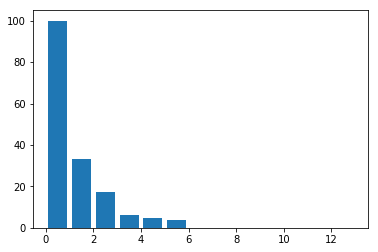

In [ ]:
plot_feature_importance(dt_regressor.feature_importances_,
                       'DecisionTreeRegressor', house_data.feature_names)

In [139]:
house_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')